# Scott Breitbach
## 11-Jan-2021
## DSC540, Weeks 5-6

In [79]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from sys import getsizeof
import matplotlib.pyplot as plt
from scipy import stats

## 1. *Data Wrangling with Python*: Activity 7, page 207
### Activity 7: Reading Tabular Data from a Web Page and Creating DataFrames
Create three **DataFrames** from the three sources mentioned on the page.

#### 1) Open the page in a separate browser tab and use something like an **Inspect Element** tool to view the source HTML and understand its structure:

\<html class='client-js ...  
-\<body class="mediawiki ...  
--\<div id="content" ...  
---\<div id="bodyContent" ...  
----\<div id="mw-content-text" ...  
-----\<div class="mw-parser-output" ...  
------\<table class="wikitable" ...  
-------\<tbody>  
--------\<tr>  [Table Descriptions]  
---------\<td style= ...  [Each Table Description]  
--------\<tr valign="top"> [All Tables]  
---------\<td> [Intividual Tables]  
----------\<table class="wikitable sortable ...  
-----------\<thead> [Individual Table Header]  
-----------\<tbody> [Individual Table Body]  

#### 2) Read the page using bs4.

In [80]:
url = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")

In [81]:
soup = BeautifulSoup(url.content, 'html.parser')

In [82]:
# print(soup.prettify())

#### 3) Find the table structure you will need to deal with.  
How many tables are there?

In [83]:
listOfDF = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")

In [84]:
numTables = len(listOfDF)
print("There are {} tables on the page.".format(numTables))

There are 10 tables on the page.


In [85]:
index = 0
for i in listOfDF:
    print("Table {}:".format(index))
    print(i.head())
    index += 1

Table 0:
                                             0
0  Largest economies by nominal GDP in 2020[1]
Table 1:
                                                   0  \
0  .mw-parser-output .legend{page-break-inside:av...   

                                                   1  \
0  $750 billion–$1 trillion $500–$750 billion $25...   

                                                   2  
0  $50–$100 billion $25–$50 billion $5–$25 billio...  
Table 2:
                                                   0  \
0  Per the International Monetary Fund (2020 esti...   
1  Rank Country/Territory GDP(US$million)  World[...   
2                                               Rank   
3                                                NaN   
4                                                  1   

                                                   1  \
0                      Per the World Bank (2019)[20]   
1  Rank Country/Territory GDP(US$million)  World ...   
2                                  Cou

#### 4) Find the right table using bs4.

In [86]:
tables = soup.find('table', {"class": "wikitable"})
print(type(tables))

<class 'bs4.element.Tag'>


#### 5) Separate the source names and their corresponding data.

In [87]:
sources = tables.tbody.findAll('tr', recursive=False)[0]
sourcesList = [td for td in sources.findAll('td')]
print('We found {} sources.'.format(len(sourcesList)))

We found 3 sources.


In [88]:
data = tables.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [89]:
dataTables = []
for td in data:
    dataTables.append(td.findAll('table'))

#### 6) Get the source names from the list of sources you have created.

In [90]:
sourceNames = [source.findAll('a')[0].getText() for source in sourcesList]
print(sourceNames)

['International Monetary Fund', 'World Bank', 'United Nations']


Alternatively:

In [91]:
titlesList = tables.tbody.tr.findAll('b')
title = []
for i in titlesList:
    title.append(i.getText())
print("Source names:")

for n in title:
    print("", n)

Source names:
 Per the International Monetary Fund (2020 estimates)
 Per the World Bank (2019)
 Per the United Nations (2019)


Or:

In [92]:
for i in range(3):
    print(soup.findAll('table')[2].tbody.tr.findAll('td')[i].a.getText())

International Monetary Fund
World Bank
United Nations


#### 7) Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that.

##### Table 1: International Monetary Fund

In [93]:
headers1 = [th.getText().strip() for th in dataTables[0][0].findAll('th')]
print("The data headers for table 1 are:\n", headers1)

The data headers for table 1 are:
 ['Rank', 'Country/Territory', 'GDP(US$million)']


In [94]:
rows1 = dataTables[0][0].findAll('tbody')[0].findAll('tr')[1:]
dataRows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
df1 = pd.DataFrame(dataRows1, columns=headers1)

In [95]:
print("Table 1:", sourceNames[0])
df1.head()

Table 1: International Monetary Fund


,Rank,Country/Territory,GDP(US$million)
0,,World[19],"83,844,988"
1,1,United States,"20,807,269"
2,2,China[n 2][n 3],"14,860,775"
3,3,Japan,"4,910,580"
4,4,Germany,"3,780,553"


#### 8) Repeat the last task for the other two data sources.

##### Table 2: World Bank

In [96]:
headers2 = [th.getText().strip() for th in dataTables[1][0].findAll('th')]
print("The data headers for table 2 are:\n", headers2)

The data headers for table 2 are:
 ['Rank', 'Country/Territory', 'GDP(US$million)']


In [97]:
rows2 = dataTables[1][0].findAll('tbody')[0].findAll('tr')[1:]
dataRows2 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows2]
df2 = pd.DataFrame(dataRows2, columns=headers2)

In [98]:
print("Table 2:", sourceNames[1])
df2.head()

Table 2: World Bank


,Rank,Country/Territory,GDP(US$million)
0,,World,"87,751,541"
1,1,United States,"21,427,700"
2,2,China[n 9],"14,342,903"
3,3,Japan,"5,081,770"
4,4,Germany,"3,845,630"


##### Table 3: United Nations

In [99]:
headers3 = [th.getText().strip() for th in dataTables[2][0].findAll('th')]
print("The data headers for table 3 are:\n", headers3)

The data headers for table 3 are:
 ['Rank', 'Country/Territory', 'GDP(US$million)']


In [100]:
rows3 = dataTables[2][0].findAll('tbody')[0].findAll('tr')[1:]
dataRows3 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows3]
df3 = pd.DataFrame(dataRows3, columns=headers3)

In [101]:
print("Table 3:", sourceNames[2])
df3.head()

Table 3: United Nations


,Rank,Country/Territory,GDP(US$million)
0,,World[22],"87,445,260"
1,1,United States,"21,433,226"
2,2,China[n 9],"14,342,933"
3,3,Japan,"5,082,465"
4,4,Germany,"3,861,123"


## 2. *Data Wrangling with Python*: Activity 8, page 233
### Activity 8: Handling Outliers and Missing Data

#### 1) Read the visit_data.csv file.

In [102]:
df = pd.read_csv('visit_data.csv')
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1000 non-null   int64  
 1   first_name  704 non-null    object 
 2   last_name   704 non-null    object 
 3   email       1000 non-null   object 
 4   gender      495 non-null    object 
 5   ip_address  1000 non-null   object 
 6   visit       974 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


#### 2) Check for duplicates.

In [104]:
print("Duplicates in:")
for name in df.columns:
    print("{:>15}:".format(name), any(df[name].duplicated()))

Duplicates in:
             id: False
     first_name: True
      last_name: True
          email: False
         gender: True
     ip_address: False
          visit: True


#### 3) Check if any essential column contains NaN.

In [105]:
print("'NaN's in:")
df.isna().any()

'NaN's in:


id            False
first_name     True
last_name      True
email         False
gender         True
ip_address    False
visit          True
dtype: bool

#### 4) Get rid of the outliers.

It appears that we have unique IDs, email and IP addresses for every line.  
There are some names, gender data, and visit info duplicated and/or missing.  
Since we will be using the 'visit' data for analysis, we will remove any rows from this column that do not contain data:

In [106]:
cleanDF = df[df['visit'].notnull()]

#### 5) Report the size difference.

In [107]:
sizeDict = {'numberOfRows': [df.shape[0], cleanDF.shape[0], df.shape[0]-cleanDF.shape[0]],
            'numberOfCols': [df.shape[1], cleanDF.shape[1], df.shape[1]-cleanDF.shape[1]],
            'sizeInBytes': [getsizeof(df), getsizeof(cleanDF), getsizeof(df)-getsizeof(cleanDF)]}
sizeDF = pd.DataFrame.from_dict(sizeDict, orient='index',
                               columns=['OriginalDF', 'CleanedDF', 'SizeDifference'])
sizeDF

,OriginalDF,CleanedDF,SizeDifference
numberOfRows,1000,974,26
numberOfCols,7,7,0
sizeInBytes,320644,320014,630


#### 6) Create a box plot to sheck for outliers.

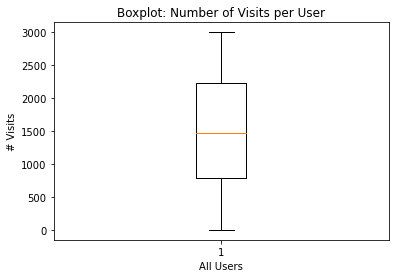

In [108]:
plt.boxplot(cleanDF['visit'])
plt.title("Boxplot: Number of Visits per User")
plt.ylabel("# Visits")
plt.xlabel("All Users")
plt.show()

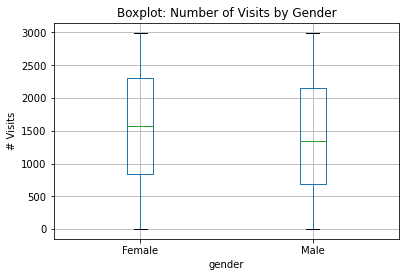

In [109]:
cleanDF.boxplot(column='visit', by='gender')
plt.title("Boxplot: Number of Visits by Gender")
plt.suptitle("")
plt.ylabel("# Visits")
plt.show()

#### 7) Get rid of any outliers.

Not seeing any points beyond the ends of the whiskers, I'll check Z-scores:

In [110]:
print("Lowest Z-score:  {0:.4f}".format(stats.zscore(cleanDF['visit']).min()))
print("Highest Z-score:  {0:.4f}".format(stats.zscore(cleanDF['visit']).max()))

Lowest Z-score:  -1.7852
Highest Z-score:  1.7889


Even the worst Z-scores are still well within 3 standard deviations (less than 2 even!), so next we'll just remove the 5th percentile from each end of the 'visit' data:

In [111]:
def removePercentiles(df, col, p):
    '''
     df: dataframe; 
    col: column name (str); 
      p: percent to remove from each end (upper, lower)
    '''
    lp =  p / 100
    up = 1 - lp
    uq = df[col].quantile(up)
    lq = df[col].quantile(lp)
    filteredDF = df[(df[col] < uq) & (df[col] > lq)]
    return filteredDF

In [112]:
newDF = removePercentiles(cleanDF, 'visit', 5)

In [113]:
sizeDict = {'numberOfRows': [cleanDF.shape[0], newDF.shape[0], cleanDF.shape[0]-newDF.shape[0]],
            'numberOfCols': [cleanDF.shape[1], newDF.shape[1], cleanDF.shape[1]-newDF.shape[1]],
            'sizeInBytes': [getsizeof(cleanDF), getsizeof(newDF), getsizeof(cleanDF)-getsizeof(newDF)]}
sizeDF = pd.DataFrame.from_dict(sizeDict, orient='index',
                               columns=['CleanedDF', 'NewDF_NoOutliers', 'SizeDifference'])
sizeDF

,CleanedDF,NewDF_NoOutliers,SizeDifference
numberOfRows,974,875,99
numberOfCols,7,7,0
sizeInBytes,320014,287487,32527


## 3. Insert data into a SQL Lite database
### Create a table with the following data (Hint: Python for Data Analysis page 191):  
#### a. Name, Address, City, State, Zip, Phone Number.  
#### b. Add at least 10 rows of data and submit your code with a query generating your results.

In [114]:
import sqlite3

In [115]:
query = """
CREATE TABLE test
(Name VARCHAR(20), Address VARCHAR(20),
 City VARCHAR(20), State   VARCHAR(20),
 Zip  INTEGER,    Phone_Number INTEGER
 );
"""

In [116]:
con = sqlite3.connect('mydata.sqlite')

In [117]:
con.execute('DROP table IF EXISTS test')

In [118]:
con.execute(query)

In [119]:
con.commit()

Generate some data:

In [120]:
import random
def rando(num):
    '''Returns the number of random digits specified'''
    return random.randrange(10**(num-1), (10**num)-1)

In [121]:
# Name, Address, City, State, Zip, Phone Number
data = [
    ('John Cleese', '{} Hurlingham Road'.format(rando(4)), 'London', 'UK', rando(5), rando(10)),
    ('Terry Gilliam', '{} High Street'.format(rando(4)), 'Acton', 'UK', rando(5), rando(10)),
    ('Michael Palin', '{} Poole Harbour'.format(rando(3)), 'Dorset', 'UK', rando(5), rando(10)),
    ('Eric Idle', '{} South Ealing Road'.format(rando(4)), 'Ealing', 'UK', rando(5), rando(10)),
    ('Graham Chapman', '{} Teddington Lock'.format(rando(3)), 'London', 'UK', rando(5), rando(10)),
    ('Terry Jones', '{} Thorpebank Road'.format(rando(4)), "Shepherd's Bush", 'UK', rando(5), rando(10)),
    ('Mr. Badger', '{} Westminster Bridge'.format(rando(3)), 'London', 'UK', rando(5), rando(10)),
    ('Luigi Vercotti', '{} Elm Hill'.format(rando(4)), 'Norwich', 'UK', rando(5), rando(10)),
    ('Inspector Praline', '{} Winterton Road'.format(rando(3)), 'Norfolk', 'UK', rando(5), rando(10)),
    ('Njorl the Viking', '{} Ringland Hills'.format(rando(3)), 'Norwich', 'UK', rando(5), rando(10)),
    ('Johann Gambolputty', '{} Ludgate Hill'.format(rando(3)), 'London', 'UK', rando(5), rando(10)),
    ('Mrs. Pepperpots', '{} Southmere Terrace'.format(rando(3)), 'Bradford', 'UK', rando(5), rando(10)),
    ('Mr. Badger', '{} Toller Lane'.format(rando(5)), 'Bradford', 'UK', rando(5), rando(10))
]

In [122]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?, ?, ?)"

In [123]:
con.executemany(stmt, data)

In [124]:
con.commit()

In [125]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()

In [126]:
df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
df

,Name,Address,City,State,Zip,Phone_Number
0,John Cleese,4225 Hurlingham Road,London,UK,75243,3828149104
1,Terry Gilliam,2222 High Street,Acton,UK,63089,2991713502
2,Michael Palin,661 Poole Harbour,Dorset,UK,78981,8930405338
3,Eric Idle,3872 South Ealing Road,Ealing,UK,37624,6923303266
4,Graham Chapman,802 Teddington Lock,London,UK,30776,4645377540
5,Terry Jones,8901 Thorpebank Road,Shepherd's Bush,UK,89208,1912649618
6,Mr. Badger,671 Westminster Bridge,London,UK,84540,4580673044
7,Luigi Vercotti,3857 Elm Hill,Norwich,UK,41755,3260140137
8,Inspector Praline,542 Winterton Road,Norfolk,UK,91938,6404389234
9,Njorl the Viking,672 Ringland Hills,Norwich,UK,97074,6464154953


In [127]:
con.close()